In [63]:
#read in pandas titanic dataset from kaggle.com
import pandas as pd
train = pd.read_csv('train.csv')
train_shape = train.shape
test = pd.read_csv("test.csv")
test_shape = test.shape
test_shape
train_shape

(891, 12)

#### EDA

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


<AxesSubplot:xlabel='Sex'>

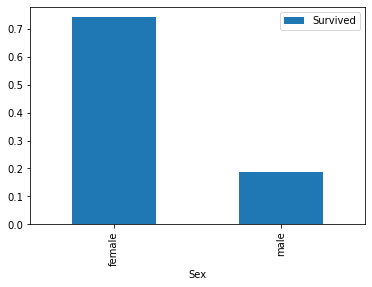

In [15]:
#explore survival by sex
print(train["Sex"].describe())
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


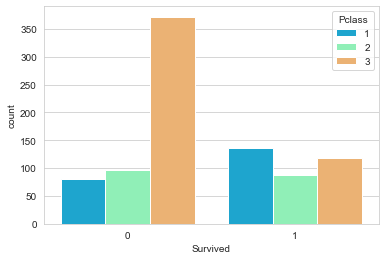

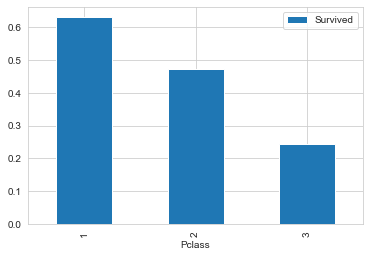

In [27]:
#explore survival by Pclass
import seaborn as sns
print(train["Pclass"].describe())

sns.set_style('whitegrid')
sns.countplot( x =train['Survived'], hue=train['Pclass'], palette='rainbow')

# pclass_pivot = train.pivot_table(index = 'Pclass', values = 'Survived')
# pclass_pivot.plot.bar()
# plt.show()

<AxesSubplot:xlabel='Age'>

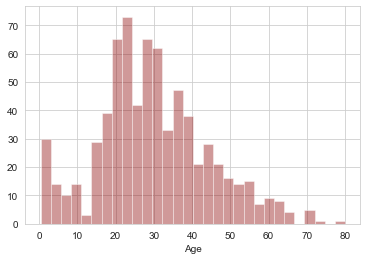

In [37]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(),bins = 30, kde=False, color='darkred')

<AxesSubplot:ylabel='Frequency'>

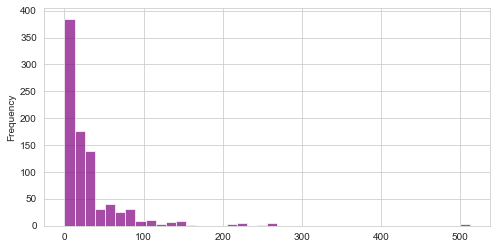

In [45]:
train['Fare'].plot.hist(color='purple', alpha = .7, bins = 40,figsize=(8,4))

#### Plotting with Cufflinks

In [47]:
import cufflinks as cf
cf.go_offline()

In [49]:
train['Fare'].iplot(kind = 'hist', bins = 40, color='purple')

#### Taking care of missing data

<AxesSubplot:>

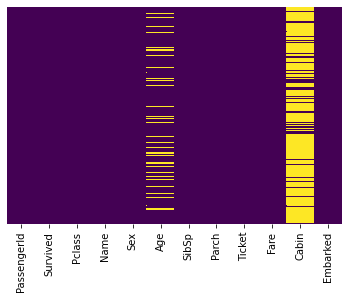

In [22]:
#exploring missing data
import seaborn as sns
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


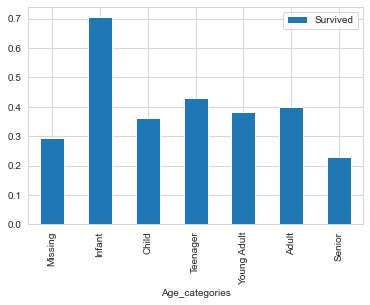

In [64]:
#explore survival by age
print(train["Age"].describe())

#fill the missing values and categorizing the age
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ['Missing','Infant','Child','Teenager','Young Adult','Adult','Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

train_pivot = train.pivot_table(index = "Age_categories", values = "Survived")
train_pivot.plot.bar()
plt.show()

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories,Pclass_2,Pclass_3,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Young Adult,0,1,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Adult,0,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Young Adult,0,1,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Young Adult,0,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Young Adult,0,1,1,0,0,0,1,0,0


#### Taking care of categorical feature

In [65]:
#convert nonnumeric values 
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name,drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train , "Sex")
test = create_dummies(test, "Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [69]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_categories,Pclass_2,Pclass_3,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,Young Adult,0,1,1,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,Adult,0,1,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,Senior,1,0,1,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,Young Adult,0,1,1,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,Young Adult,0,1,0,0,0,0,1,0,0


#### Building Logistic Regression Model

In [78]:
#Using Logistic Regression
columns = ['Pclass_2', 'Pclass_3','Sex_male',
        'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.model_selection import train_test_split
X = train[columns]
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

#### Make predictions on Test data


In [82]:
from sklearn.metrics import classification_report
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.86      0.69      0.76        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



In [84]:
#make predictions on holdout dataset
holdout = test
holdout_predictions = lr.predict(test[columns])

In [86]:
#create submission file
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv('submission.csv',index = False)